#Descripcion:

---
En el mundo hay 4 formas de medir la temperatura:


1.  Escala Fahrenheit (EEUU): el agua se congela a 32° y hierve a las 212°
2.  Escala Celsius (No EEUU): el agua se congela a 0° y hierve a las 100°
3.  Escala De Kelvin (cientifico): el agua se congela a 273.15 k y hierve a las 373.15 k
4. Escala De Rankine (obsoleto):  el agua se congela a 0° y hierve a las 671.67°



---



*   Crearemos un software con programación regular para conversión de grados (celsius a fahrenheit).
*   Crearemos una IA que permita convertir grados Celsius a Fharenheit (sin reglas ni logíca)



#Conversión con Programación clasica/regular

Donde el programador:
*  Crea las reglas 
*  Crea la logica de como se aplican esas reglas.

Ejemplo: software para convertir grados Celsius a Fahrenheit:

Fah = Celsius * 1.8 + 32



In [52]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')

50° Celsius=  122.0 ° Fahrenheit 


*  pero y si no conocemos las reglas?
*  y si no es la logica es muy compleja o peor es muy variable?


#Conversión con IA 

*   Una red con una capa de entrada y una de salida
*   para que entrene le pasamos los grados celsius y su conversión fahrenheit 
*   La red neuronal aprendera por si sola las reglas y la logíca con todas sus variaciones (pesos y sesgos).
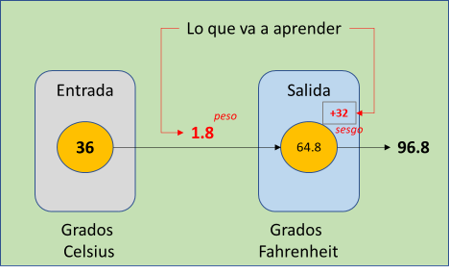

##P1. importando librerias.

In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [54]:
df_temperatura = pd.read_csv("https://raw.githubusercontent.com/Moisesdv10/Deep-Learning/main/Databases/celsius_a_fahrenheit%20_final.csv")
df_temperatura.head(20)

,Celsius,Fahrenheit
0,-100,-148.0
1,-99,-145.2
2,-98,-144.4
3,-97,-142.6
4,-96,-140.8
5,-95,-139.0
6,-94,-137.2
7,-93,135.4
8,-92,-136.6
9,-91,-131.8


In [55]:
df_temperatura.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     201 non-null    int64  
 1   Fahrenheit  201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [56]:
df_temperatura.isnull().sum()

Celsius       0
Fahrenheit    0
dtype: int64

##P2. definiendo los parametros de entrada y salida (capas)
---
tomaremos 10 datos (muuuuuuuuuuy pocos...pero sirve pa la explicación)


In [57]:
celsius = df_temperatura['Celsius'] #Parametros de entrada
fahrenheit = df_temperatura.get('Fahrenheit') #Parametros de salida

##P3. creando la red neuronal

---



*   Usamos Keras como libreria de alto nivel (facilita mucho la creación de redes neuronales)
*   usaremos un modelo secuencial (una red simple), hay más modelos, ejemplo: CNN, LSTM/ RNN, GAN, BERT
*   crearemos 3 capas densas, que son aquellas que tiene conexiones con todas las neuronas de la siguiente capa, donde:
    *   Units= cantidad de neuronas
    *   input_shape= cantidad de nueronas de entrada   
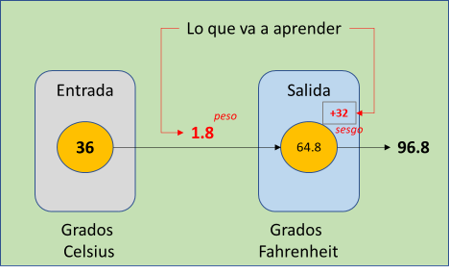 

In [58]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

###P3.1 compilamos la red:


*   Usaremos el optimizador ADAM, hay otros más complejos como RELU, SOFTMAX...etc...es quien le dice a la red como ajustar los pesos y los sesgos (le dice como aprender y no desaprender)
*  definiremos una tasa de aprendizaje de 0.1 (entre más pequeño el número el ajuste es menor y más tiempo dura en aprender).
*   tomaremos la una función de calculo de perdida del aprendizaje llamada "MEAN_SQUARED_ERROR- error cuadradico medio", que es "una poca cantidad de error grandes es PEOR que una gran cantidad de errores pequeños" 



In [59]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

##P4.entrenando

In [60]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 1524.5427
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 1457.0865
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 1400.2668
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 1360.0717
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 1325.1403
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 1280.9478
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 1244.6873
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 1210.8019
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 1168.4474
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 1132.9000
Epoch 11/1000
7/7 [==============================] - 0s 1ms/step - loss: 1139.7616
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - l

###P4.1 resultados del entrenamiento

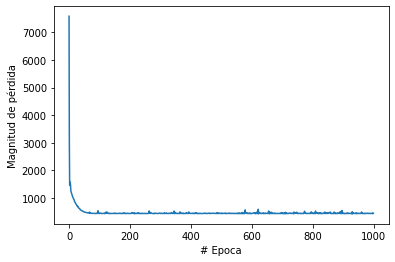

In [48]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

##P5. hagamos una predicción

In [49]:
v_celsius= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[103.120834]] 
Regular:  104.0 
Dif %: [[0.8453522]]


##P6. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 




In [61]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.7382551]]
sesgo:  [32.58996]


la red sin decirle las reglas ni la logica pudo ella sola generar un algorimo para calcular un valor aproximado del 99% de acertabilidad.

fahr= cels *1.8 + 32

y= mx + b  (regresión lineal)

##P7.¿Más neuronas y más capas?

###P7.1 creamos un modelo con dos capas ocultas

In [62]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [63]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [64]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo_v2.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
modelo_v2 entrenado!


###P7.2 resultados del entrenamiento

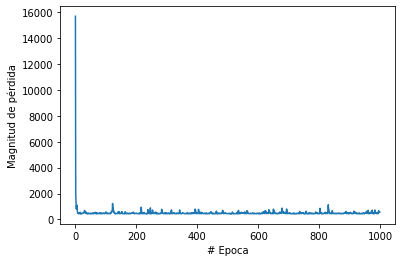

In [65]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

###P7.3. conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 


In [66]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.31273717,  1.0511875 ,  0.15113476]], dtype=float32), array([-2.361252  ,  6.9743237 ,  0.05545403], dtype=float32)]
[array([[ 0.3039746 ,  0.81833524, -0.08409797],
       [-1.3357543 , -0.23748817,  0.078356  ],
       [ 0.03782388, -0.12878463,  0.40477425]], dtype=float32), array([-9.406718 ,  3.1395867, -2.0427318], dtype=float32)]
[array([[-1.1351796 ],
       [-0.16027218],
       [-0.10570644]], dtype=float32), array([10.887473], dtype=float32)]


###P7.4. hagamos una predicción

In [67]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[121.23932]] 
Regular:  122.0 
Dif %: [[0.62351227]]


#CONCLUSIONES:


---

El uso de redes neuronales es aplicable en casí cualquier problema que requiera clasificación o predicción  

Al usar capas ocultas:
2.  El aprendizaje se realiza en menor cantida de EPOCS/CICLOS y configurando algunos Hyper-parametros el modelo se vuelve más eficiente
3.   La signación de pesos y sesgos se vuelve más complejo de analizar
4.   La cantidad de capas y neuronas NO se hace de forma aleatoria, se hace usando una formula de compensación (la veremos despues).


